In [32]:
from __init__ import *
import utils as _U
reload(_U)
import dataset as _D
reload(_D)
import model as _M
reload(_M)
import train as _T
reload(_T)
import test as _TE
reload(_TE)
import inference as _I
reload(_I)

<module 'inference' from '/root/CNN-for-Trading/inference.py'>

In [3]:
from torch.utils.data.dataset import Subset

## Training Settings

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#### 导入配置文件

In [4]:
with open('configs/I20R5/I20R5xk_19-21_0130.yml', 'r') as f:
    setting = _U.Dict2ObjParser(yaml.safe_load(f)).parse()

In [5]:
if 'models' not in os.listdir('./'):
    os.system('mkdir models')
if setting.TRAIN.MODEL_SAVE_FILE.split('/')[1] not in os.listdir('./models/'):
    os.system(f"cd models && mkdir {setting.TRAIN.MODEL_SAVE_FILE.split('/')[1]}")
if 'logs' not in os.listdir('./'):
    os.system('mkdir logs')
if setting.TRAIN.LOG_SAVE_FILE.split('/')[1] not in os.listdir('./logs/'):
    os.system(f"cd logs && mkdir {setting.TRAIN.LOG_SAVE_FILE.split('/')[1]}")

In [6]:
k=pd.read_csv('/root/CNN-for-Trading/output_file1.csv')
k.head()

,code,date,open,high,low,close,volume,SETTLE,OI
0,A2001.DCE,20200102,3266.0,3355.0,3266.0,3346.0,2238,3326.0,1447
1,A2001.DCE,20200103,3375.0,3380.0,3375.0,3380.0,66,3379.0,361
2,A2001.DCE,20200106,3390.0,3390.0,3371.0,3375.0,461,3379.0,420
3,A2001.DCE,20200107,3395.0,3405.0,3380.0,3399.0,283,3398.0,224
4,A2001.DCE,20200108,3380.0,3399.0,3380.0,3399.0,116,3392.0,124


In [7]:
a=k['date'].describe()

In [8]:
#总数据集的数据行数
len(k)

251971

In [9]:
a

count    2.519710e+05
mean     2.021516e+07
std      1.067640e+04
min      2.020010e+07
25%      2.021011e+07
50%      2.021122e+07
75%      2.022111e+07
max      2.023101e+07
Name: date, dtype: float64

In [29]:
a[7]

20231011.0

In [208]:
num_k=0
for i in range(len(k)):
    key=k.loc[i,'date']
    if a[3]<=key & key<=a[7]:
        num_k+=1

In [209]:
num_k

251971

时间跨度20200100-20231010

In [30]:
num_2020=0
num_2021=0
num_2022=0
num_2023=0
num_k=0
for i in range(len(k)):
    key=k.loc[i,'date']
    if a[3]<=key<=20201231:
        num_2020=num_2020+1
    elif 20210101<=key<=20211231:
        num_2021=num_2021+1
    elif 20220101<=key<=20221231:
        num_2022=num_2022+1
        if 20220101<=key<=20220630:
            num_k=num_k+1
    elif 20230101<=key<=a[7]:
        num_2023=num_2023+1

In [31]:
#各个年段的数据数
print(num_2020,num_2021,num_2022,num_2023,num_k)

61152 68435 69919 52465 33366


In [12]:
n=num_2020+num_2021+num_2022+num_2023
n

251971

In [28]:
# 通过设置 max_rows 为 None，可以显示所有行
pd.set_option('display.max_rows', None)

In [29]:
k[k['code']=='A2005.DCE']

,code,date,open,high,low,close,volume,SETTLE,OI
7,A2005.DCE,20200102,3856.0,3876.0,3847.0,3861.0,29163,3864.0,77255
8,A2005.DCE,20200103,3861.0,3893.0,3860.0,3877.0,41752,3879.0,78390
9,A2005.DCE,20200106,3873.0,3911.0,3864.0,3909.0,47803,3887.0,79011
10,A2005.DCE,20200107,3915.0,3943.0,3906.0,3916.0,56399,3923.0,81546
11,A2005.DCE,20200108,3916.0,3965.0,3907.0,3954.0,52739,3936.0,84844
12,A2005.DCE,20200109,3950.0,4038.0,3947.0,4029.0,114346,4000.0,101548
13,A2005.DCE,20200110,4029.0,4129.0,4024.0,4092.0,209291,4079.0,111979
14,A2005.DCE,20200113,4088.0,4148.0,4079.0,4111.0,127479,4117.0,115826
15,A2005.DCE,20200114,4116.0,4139.0,4095.0,4138.0,78412,4118.0,124933
16,A2005.DCE,20200115,4142.0,4145.0,4105.0,4130.0,83427,4122.0,127906


In [9]:
unique_values_count = k['code'].nunique()
unique_values_count

1520

In [8]:
unique_values = k['code'].unique()
#print(f"The unique values in the column are: {unique_values.tolist()}")

总数据集中一共有1520种期货

In [218]:
##一共有251971条数据
len(k)

251971

## Train & Valid

### Dataset Preparation

#### 载入train和valid需要的数据集
训练集的详细信息详见config文件

### 转化为图片,采样率是0.2，是按照index顺序采样的

sample_rate 是一个用于生成图像的采样率参数。采样率通常用于调整数据的密度或频率，而在图像生成的上下文中，它可能表示在时间序列数据中选取的数据点的比例或频率。

具体而言，这里可能是指在生成图像时，对于原始时间序列数据，仅选择其中一部分数据点，以减少数据量并加快图像生成的速度。

# 自己的re_train模式

In [10]:
#这里的参数是yml文件里声明的
retrain_dataset = _D.ImageDataSet(win_size = setting.DATASET.LOOKBACK_WIN, \
                            start_date = setting.DATASET.START_DATE, \
                            end_date = setting.DATASET.END_DATE, \
                            mode = 'retrain', \
                            label = setting.TRAIN.LABEL, \
                            indicators = setting.DATASET.INDICATORS, \
                            show_volume = setting.DATASET.SHOW_VOLUME, \
                            parallel_num=setting.DATASET.PARALLEL_NUM)

[Load Data] | 2024-02-01 03:04:26 Done | Using  0.296 seconds
DataSet Initialized
 	 - Mode:         RETRAIN
 	 - Image Size:   (64, 60)
 	 - Time Period:  20191231 - 20211231
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


In [11]:
retrain_image_set = retrain_dataset.generate_images(setting.DATASET.SAMPLE_RATE)

Generating Images (sample rate: 0.4): 100%|██████████| 935/935 [02:08<00:00,  7.28it/s]


In [36]:
retrain_image_set[1][0]

'A2005.DCE'

In [38]:
retrain_image_set[1][2]

[20200211,
 20200212,
 20200214,
 20200218,
 20200219,
 20200224,
 20200302,
 20200303,
 20200304,
 20200312,
 20200326,
 20200330,
 20200331,
 20200409,
 20200420,
 20200422,
 20200424,
 20200429,
 20200430,
 20200506,
 20200507,
 20200515]

In [30]:
retrain_image_set[1][1][3]

[array([[  0., 255.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 0,
 1,
 20200114,
 20200218]

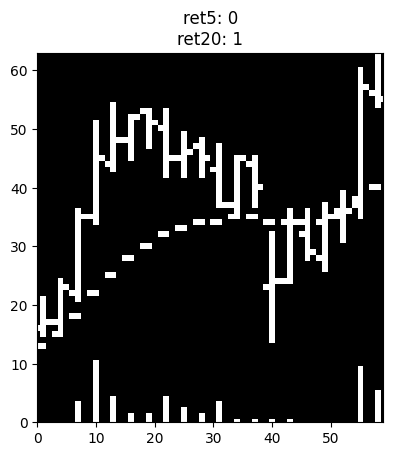

In [23]:
_U.display_image(retrain_image_set[1][1][0][0:3])

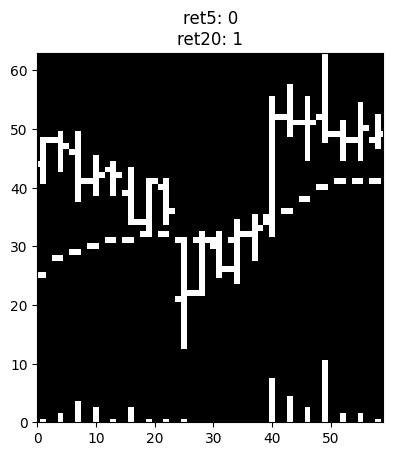

In [31]:
_U.display_image(retrain_image_set[1][1][3][0:3])

## 不用做

In [86]:
newstart=0
for j in range(len(retrain_image_set)):
    start=newstart
    if j==0:
        start=0
    elif (j!=0) and (retrain_image_set[j][5]!=retrain_image_set[j-1][5]):
        end=j
        ka=0
        num=end-start
        newstart=j
        for i in range (start,end):
            #开始日期
            a=retrain_image_set[i][3]
            if a<20210601:
                ka=ka+1
        #ratio=ka/num
        #ka_all.append(ka)
        
        #对每种股票划分训练测试集
        key_train_loader_size=ka
        
        key_valid_loader_size=num-key_train_loader_size
        
        #划分训练测试集
        key=retrain_image_set[start:end]
        key_train_loader = Subset(key, range(key_train_loader_size))
        key_valid_loader = Subset(key, range(key_train_loader_size, key_train_loader_size + key_valid_loader_size))
        
        if start==0:
            key_all_train_loader=key_train_loader
            key_all_valid_loader=key_valid_loader
        else:
            key_all_train_loader=key_all_train_loader+key_train_loader
            key_all_valid_loader=key_all_valid_loader+key_valid_loader

In [71]:
newstart

16

In [100]:
key=retrain_image_set[16:30]
key_train_loader = Subset(key, range(10))
key_valid_loader = Subset(key, range(10,20))
key_train_loader[9]
#key_valid_loader[0]
key_all_train_loader=key_train_loader[0]+key_train_loader[1]

In [103]:
key_train_loader[1]

[array([[  0., 255.,   0., ...,   0., 255.,   0.],
        [  0., 255.,   0., ...,   0., 255.,   0.],
        [  0., 255.,   0., ...,   0., 255.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.]]),
 0,
 0,
 20200109,
 20200213,
 'A2009.DCE']

In [105]:
all=key_train_loader[0]
all.append(key_train_loader[1])
all

[array([[  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 1,
 1,
 20200102,
 20200206,
 'A2009.DCE',
 [...],
 [array([[  0., 255.,   0., ...,   0., 255.,   0.],
         [  0., 255.,   0., ...,   0., 255.,   0.],
         [  0., 255.,   0., ...,   0., 255.,   0.],
         ...,
         [  0.,   0.,   0., ...,   0., 255.,   0.],
         [  0.,   0.,   0., ...,   0., 255.,   0.],
         [  0.,   0.,   0., ...,   0., 255.,   0.]]),
  0,
  0,
  20200109,
  20200213,
  'A2009.DCE']]

In [33]:
retrain_image_set[16][5]

'A2009.DCE'

In [32]:
for i in range(start,end):
    print(i,retrain_image_set[i][5])

0 A2005.DCE
1 A2005.DCE
2 A2005.DCE
3 A2005.DCE
4 A2005.DCE
5 A2005.DCE
6 A2005.DCE
7 A2005.DCE
8 A2005.DCE
9 A2005.DCE
10 A2005.DCE
11 A2005.DCE
12 A2005.DCE
13 A2005.DCE
14 A2005.DCE
15 A2005.DCE


In [ ]:
unique_values = retrain_image_set[1].unique()
#print(f"The unique values in the column are: {unique_values.tolist()}")

In [17]:
num_train=0
num_all=0
for i in range(len(k)):
    key=k.loc[i,'date']
    if a[3]<key<20210601:
        num_train=num_train+1
    if a[3]<key<20211231:
        num_all=num_all+1

In [18]:
print(num_train,num_all)

88381 129078


In [29]:
len(retrain_image_set[1][2])

8

In [23]:
retrain_image_set[1][2][0]

20200217

In [95]:
for i in range (len(retrain_image_set[500][2])):
    a=retrain_image_set[500][1][i][3]
    b=retrain_image_set[500][1][i][4]
    c=retrain_image_set[500][2][i]
    print("开始日期是: {},截止日期是: {},valid_dates是: {}".format(a, b,c))

开始日期是: 20210118,截止日期是: 20210222,valid_dates是: 20210222
开始日期是: 20210122,截止日期是: 20210226,valid_dates是: 20210226
开始日期是: 20210204,截止日期是: 20210310,valid_dates是: 20210310
开始日期是: 20210209,截止日期是: 20210315,valid_dates是: 20210315
开始日期是: 20210210,截止日期是: 20210316,valid_dates是: 20210316
开始日期是: 20210318,截止日期是: 20210415,valid_dates是: 20210415
开始日期是: 20210414,截止日期是: 20210514,valid_dates是: 20210514
开始日期是: 20210416,截止日期是: 20210518,valid_dates是: 20210518
开始日期是: 20210419,截止日期是: 20210519,valid_dates是: 20210519
开始日期是: 20210428,截止日期是: 20210528,valid_dates是: 20210528
开始日期是: 20210506,截止日期是: 20210602,valid_dates是: 20210602
开始日期是: 20210611,截止日期是: 20210709,valid_dates是: 20210709
开始日期是: 20210629,截止日期是: 20210726,valid_dates是: 20210726
开始日期是: 20210701,截止日期是: 20210728,valid_dates是: 20210728
开始日期是: 20210719,截止日期是: 20210813,valid_dates是: 20210813
开始日期是: 20210803,截止日期是: 20210830,valid_dates是: 20210830
开始日期是: 20210804,截止日期是: 20210831,valid_dates是: 20210831
开始日期是: 20210806,截止日期是: 20210902,valid_dates是: 20210902
开始日期是: 202

In [26]:
ka=0
for i in range (len(retrain_image_set[1][2])):
    a=retrain_image_set[1][1][i][3]
    b=retrain_image_set[1][1][i][4]
    c=retrain_image_set[1][2][i]
    if a<20210601:
        ka=ka+1
ka

8

In [27]:
len(retrain_image_set[1][2])

8

In [111]:
key=retrain_image_set[0]

In [115]:
key_code=[]
for i in range(len(retrain_image_set)):
    key_code.append(retrain_image_set[i][0])

In [33]:
key=retrain_image_set[0][1]
len(key)

39

In [145]:
key_all_train_loader=key_train_loader
key_all_train_loader=key_all_train_loader+key_train_loader

In [149]:
len(key_all_train_loader)

28

In [31]:
'''
for j in range(len(retrain_image_set)):
    #每种股票的图片数
    num=len(retrain_image_set[j][2])
    print(num)
'''

'\nfor j in range(len(retrain_image_set)):\n    #每种股票的图片数\n    num=len(retrain_image_set[j][2])\n    print(num)\n'

In [58]:
len(retrain_image_set[1048][2])

0

In [80]:
len(retrain_image_set[1][0])

9

In [87]:
retrain_image_set[1][1][0][4]

20200317

In [75]:
retrain_image_set[0][0]

'A2001.DCE'

## 查看怎么打标注

In [10]:
len(retrain_image_set)

935

In [33]:
retrain_image_set[934][0]

'ZN2212.SHF'

In [71]:
#期货的种数
len(retrain_image_set)

935

In [23]:
# 通过设置 max_rows 为 None，可以显示所有行
pd.set_option('display.max_rows', None)

In [35]:
k.head()

,code,date,open,high,low,close,volume,SETTLE,OI
0,A2001.DCE,20200102,3266.0,3355.0,3266.0,3346.0,2238,3326.0,1447
1,A2001.DCE,20200103,3375.0,3380.0,3375.0,3380.0,66,3379.0,361
2,A2001.DCE,20200106,3390.0,3390.0,3371.0,3375.0,461,3379.0,420
3,A2001.DCE,20200107,3395.0,3405.0,3380.0,3399.0,283,3398.0,224
4,A2001.DCE,20200108,3380.0,3399.0,3380.0,3399.0,116,3392.0,124


In [24]:
k[k['code']=='A2005.DCE']

,code,date,open,high,low,close,volume,SETTLE,OI
7,A2005.DCE,20200102,3856.0,3876.0,3847.0,3861.0,29163,3864.0,77255
8,A2005.DCE,20200103,3861.0,3893.0,3860.0,3877.0,41752,3879.0,78390
9,A2005.DCE,20200106,3873.0,3911.0,3864.0,3909.0,47803,3887.0,79011
10,A2005.DCE,20200107,3915.0,3943.0,3906.0,3916.0,56399,3923.0,81546
11,A2005.DCE,20200108,3916.0,3965.0,3907.0,3954.0,52739,3936.0,84844
12,A2005.DCE,20200109,3950.0,4038.0,3947.0,4029.0,114346,4000.0,101548
13,A2005.DCE,20200110,4029.0,4129.0,4024.0,4092.0,209291,4079.0,111979
14,A2005.DCE,20200113,4088.0,4148.0,4079.0,4111.0,127479,4117.0,115826
15,A2005.DCE,20200114,4116.0,4139.0,4095.0,4138.0,78412,4118.0,124933
16,A2005.DCE,20200115,4142.0,4145.0,4105.0,4130.0,83427,4122.0,127906


In [192]:
retrain_image_set[1][0]

'A2005.DCE'

In [20]:
print(retrain_image_set[1][2][0],retrain_image_set[1][2][1])

20200206 20200207


In [194]:
retrain_image_set[1][1][0][0:5]

[array([[  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 1,
 1,
 20200102,
 20200206]

In [204]:
retrain_image_set[1][1][1][0:5]

[array([[  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.]]),
 0,
 1,
 20200107,
 20200211]

In [42]:
retrain_image_set[1][1][12][0:5]

[array([[  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 1,
 1,
 20200218,
 20200316]

In [43]:
retrain_image_set[1][2][12]

20200316

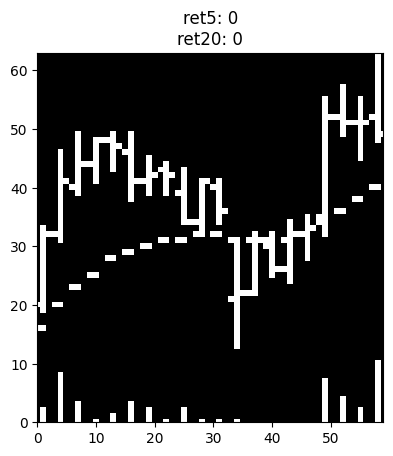

In [203]:
_U.display_image(retrain_image_set[1][1][2][0:3])

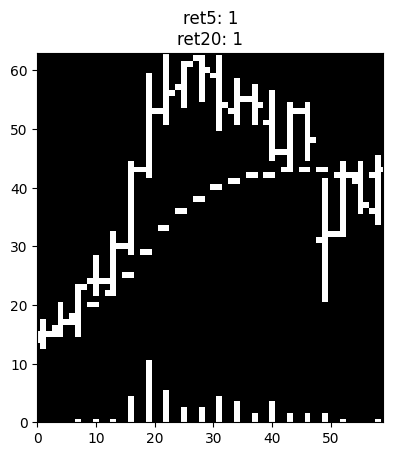

In [26]:
_U.display_image(retrain_image_set[1][1][0][0:3])

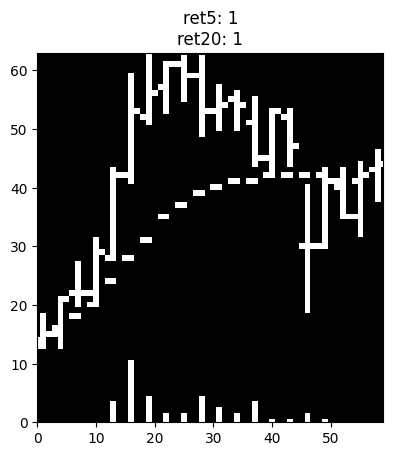

In [27]:
_U.display_image(retrain_image_set[1][1][1][0:3])

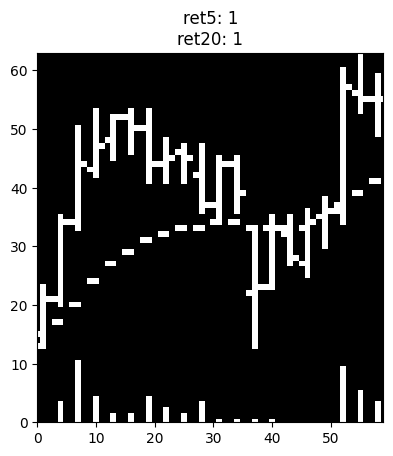

In [29]:
_U.display_image(retrain_image_set[1][1][3][0:3])

In [12]:
import pandas as pd

# 创建一个简单的示例 DataFrame
data = {'date': pd.date_range('2022-01-01', periods=10, freq='D'),
        'close': [100, 105, 95, 110, 120, 115, 105, 108, 112, 120]}
df = pd.DataFrame(data)
#（115-100）/100×100%
# 计算每日收盘价相对于过去5个交易日的百分比变化
percentage_change_5d = (df['close'].pct_change(5) * 100)
percentage_change_5d_shift=(df['close'].pct_change(5) * 100).shift(-5)
print(percentage_change_5d)
print(percentage_change_5d_shift)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5    15.000000
6     0.000000
7    13.684211
8     1.818182
9     0.000000
Name: close, dtype: float64
0    15.000000
1     0.000000
2    13.684211
3     1.818182
4     0.000000
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
Name: close, dtype: float64


In [162]:
retrain_image_set[2][1][1]

[array([[  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 1,
 1,
 20200107,
 20200211]

## 正式划分训练验证集

In [149]:
#划分训练验证集
import splitdata as _S
reload(_S)
key_all_train_loader,key_all_valid_loader,key_date=_S.split_train_valid(retrain_image_set)

In [150]:
#训练集里的图片数
len(key_all_train_loader)

84472

In [153]:
#验证集里面的图片数
len(key_all_valid_loader)

16157

In [154]:
print(len(key_all_train_loader)+len(key_all_valid_loader))

100629


In [155]:
d=0
for i in range(len(retrain_image_set)):
    d=d+len(retrain_image_set[i][1])

In [156]:
#总图片数,符合！！！！
d

100629

In [78]:
len(num_all)

935

## 对划分训练验证集后的验证

In [121]:
'''
for i in range(300):
    print(key_all_train_loader[i][3])
'''

'\nfor i in range(300):\n    print(key_all_train_loader[i][3])\n'

In [65]:
for i in range(num_all[1]-ka_all[1]):
    print(key_all_valid_loader[i][3])

In [66]:
for i in range(ka_all[0],ka_all[0]+ka_all[1]):
    print(key_all_train_loader[i][3])

20200113
20200117
20200205
20200305
20200309
20200318
20200403
20200424
20200506
20200603


## 重新划分后的训练集和验证集的训练

In [158]:
#创建了一个名为 train_loader 的数据加载器，该加载器可以在训练模型时按照指定的批次大小和是否洗牌的要求加载训练数据。
#承接自己做的key_all_train_loader和key_all_valid_loader
retrain_loader = torch.utils.data.DataLoader(dataset=key_all_train_loader, batch_size=setting.TRAIN.BATCH_SIZE, shuffle=True)
revalid_loader = torch.utils.data.DataLoader(dataset=key_all_valid_loader, batch_size=setting.TRAIN.BATCH_SIZE, shuffle=True)

In [133]:
type(retrain_loader)

torch.utils.data.dataloader.DataLoader

In [159]:
#网络模型构建，20天的模型
model_d20 = _M.CNN20d()
model_d20.to(device)

CNN20d(
  (conv1): Sequential(
    (Conv): Conv2d(1, 64, kernel_size=(5, 3), stride=(3, 1), padding=(3, 1), dilation=(2, 1))
    (BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (ReLU): ReLU()
    (Max-Pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (Conv): Conv2d(64, 128, kernel_size=(5, 3), stride=(1, 1), padding=(3, 1))
    (BN): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (ReLU): ReLU()
    (Max-Pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (Conv): Conv2d(128, 256, kernel_size=(5, 3), stride=(1, 1), padding=(2, 1))
    (BN): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (ReLU): ReLU()
    (Max-Pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (DropOut): Dropout(p=0.5

In [175]:
#二元交叉熵损失函数，用于二分类问题，最小化模型输出与实际标签之间的二元交叉熵
criterion = nn.BCELoss()
'''
优化器执行模型参数的更新。
- Adam 是一种常用的随机梯度下降优化算法的变种，它具有自适应学习率的特性。
- weight_decay 是正则化项的权重，用于控制模型的复杂度。正则化有助于防止过拟合。
'''
optimizer = optim.Adam(model_d20.parameters(), lr=setting.TRAIN.LEARNING_RATE, weight_decay=setting.TRAIN.WEIGHT_DECAY)

In [176]:
setting.TRAIN.WEIGHT_DECAY

0.001

### 这步已经生成模型了 不用重复再做，可以直接跳到测试

In [177]:
##正式开始训练,target根据yaml文件里的label来定，目前target是ret5的标签
retrain_loss_set, revalid_loss_set, retrain_acc_set, revalid_acc_set = _T.train_n_epochs(setting.TRAIN.NEPOCH, model_d20, setting.TRAIN.LABEL,retrain_loader,revalid_loader, criterion, optimizer, setting.TRAIN.MODEL_SAVE_FILE, setting.TRAIN.EARLY_STOP_EPOCH)

Epoch: 1 Training Loss: 0.607369 Validation Loss: 0.737430 Training Acc: 0.66926 Validation Acc: 0.50962
Validation loss decreased (inf --> 0.737430).  Saving model ...
Epoch: 2 Training Loss: 0.607491 Validation Loss: 0.738949 Training Acc: 0.66770 Validation Acc: 0.51006
Epoch: 3 Training Loss: 0.607270 Validation Loss: 0.736494 Training Acc: 0.66807 Validation Acc: 0.50294
Validation loss decreased (0.737430 --> 0.736494).  Saving model ...
Epoch: 4 Training Loss: 0.603675 Validation Loss: 0.738416 Training Acc: 0.67089 Validation Acc: 0.50504
Epoch: 5 Training Loss: 0.604683 Validation Loss: 0.739212 Training Acc: 0.66983 Validation Acc: 0.50987
Epoch: 6 Training Loss: 0.602179 Validation Loss: 0.739608 Training Acc: 0.67054 Validation Acc: 0.50412
Epoch: 7 Training Loss: 0.602516 Validation Loss: 0.739889 Training Acc: 0.67299 Validation Acc: 0.50350
Epoch: 8 Training Loss: 0.600600 Validation Loss: 0.738435 Training Acc: 0.67376 Validation Acc: 0.50207
Epoch: 9 Training Loss: 0.6

## 训练后绘图

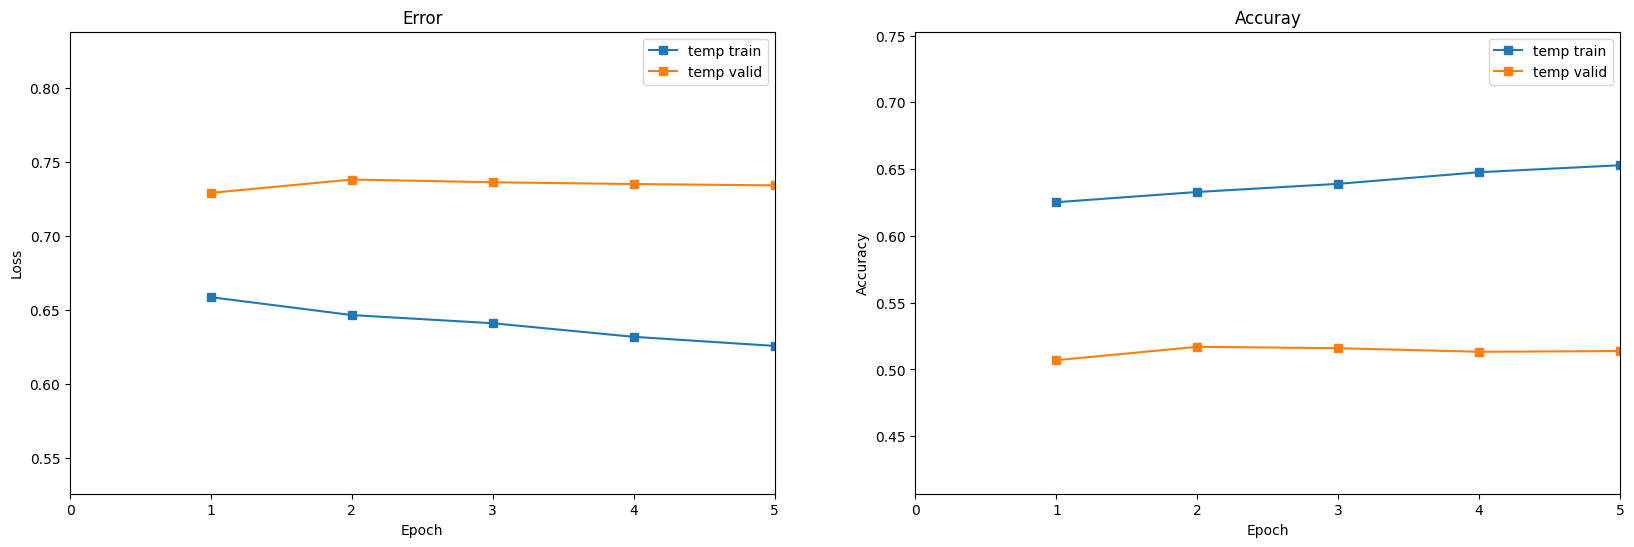

In [171]:
_T.plot_loss_and_acc({"temp train": [retrain_loss_set, retrain_acc_set], \
                    "temp valid": [revalid_loss_set, revalid_acc_set]})

In [106]:
log = pd.DataFrame([retrain_loss_set, retrain_acc_set, revalid_loss_set, revalid_acc_set], index=['train_loss', 'train_acc', 'valid_loss', 'valid_acc'])
log.to_csv(setting.TRAIN.LOG_SAVE_FILE)

In [107]:
logs = pd.read_csv(setting.TRAIN.LOG_SAVE_FILE, index_col=0).T

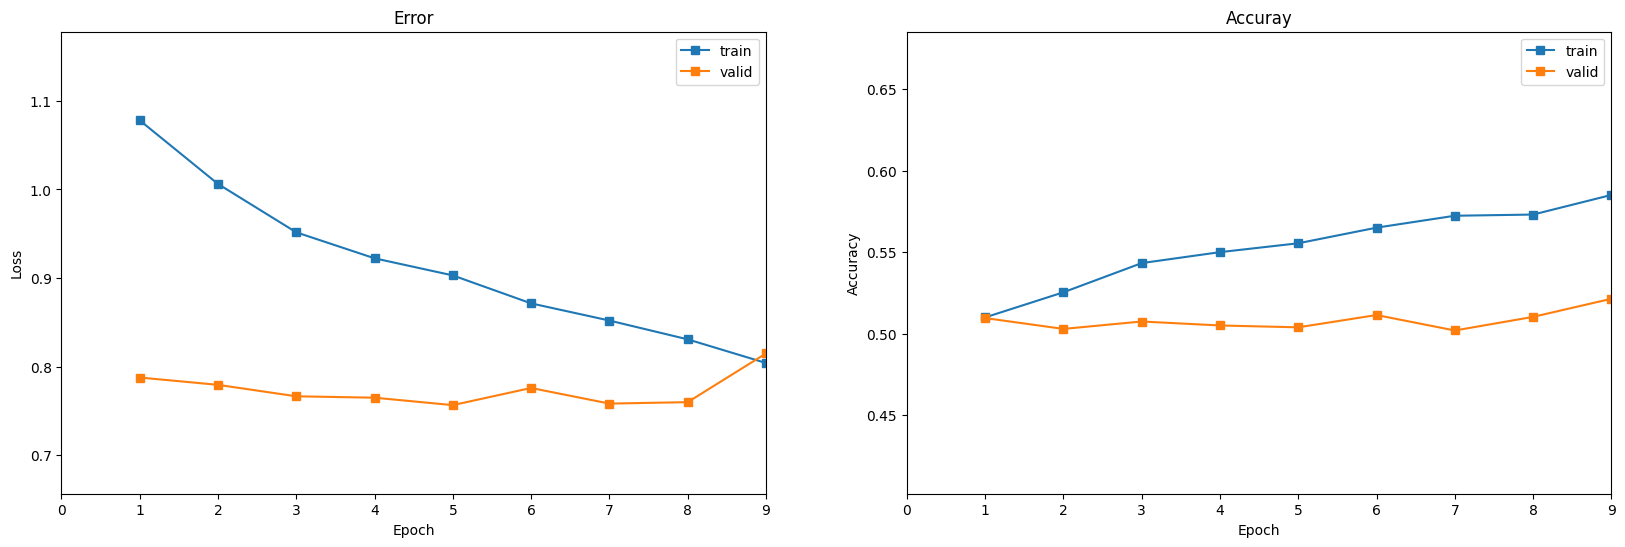

In [108]:
_T.plot_loss_and_acc({"train": [logs['train_loss'], logs['train_acc']], \
                    "valid": [logs['valid_loss'], logs['valid_acc']]})

## 改后的测试

In [186]:
##模型
model_best =  _M.CNN20d()
model_best.to(device)

# Load Model
##加载训练好的模型/root/CNN-for-Trading/models/I20R5_OHLC/I20R5_OHLC_19-21.tar
state_dict = torch.load(setting.TRAIN.MODEL_SAVE_FILE)
model_best.load_state_dict(state_dict['model_state_dict'])

<All keys matched successfully>

In [187]:
setting.TRAIN.MODEL_SAVE_FILE

'models/I20R5_OHLC/I20R5_OHLC_19-21_0130.tar'

## 开始测试

In [62]:
setting.TEST.START_DATE

20211231

In [188]:
criterion = nn.BCELoss()
##第一列标注down,第二列标注up
_TE.model_test(model_best, setting.TRAIN.LABEL, ['down', 'up'], criterion, setting)

Testing: 20221231 - 20230401
[Load Data] | 2024-01-31 07:56:59 Done | Using  0.252 seconds
DataSet Initialized
 	 - Mode:         TEST
 	 - Image Size:   (64, 60)
 	 - Time Period:  20221231 - 20230401
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 442/442 [00:43<00:00, 10.16it/s]


good:
Testing: 20230401 - 20230701
[Load Data] | 2024-01-31 07:57:45 Done | Using  0.218 seconds
DataSet Initialized
 	 - Mode:         TEST
 	 - Image Size:   (64, 60)
 	 - Time Period:  20230401 - 20230701
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 438/438 [00:44<00:00,  9.95it/s]


good:
Testing: 20230701 - 20231001
[Load Data] | 2024-01-31 07:58:32 Done | Using  0.216 seconds
DataSet Initialized
 	 - Mode:         TEST
 	 - Image Size:   (64, 60)
 	 - Time Period:  20230701 - 20231001
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 379/379 [00:47<00:00,  7.96it/s]


good:
Testing: 20231001 - 20231231
[Load Data] | 2024-01-31 07:59:24 Done | Using  0.215 seconds
DataSet Initialized
 	 - Mode:         TEST
 	 - Image Size:   (64, 60)
 	 - Time Period:  20231001 - 20231231
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 309/309 [00:01<00:00, 179.71it/s]


good:
Test Loss: 0.760386

Test Accuracy of  down: 42% (9677/22569)
Test Accuracy of    up: 57% (13564/23696)

Test Accuracy (Overall): 50% (23241/46265)


## 改后的推理

In [197]:
output_all

tensor([[0.3045, 0.6955],
        [0.2601, 0.7399],
        [0.6101, 0.3899],
        [0.1843, 0.8157],
        [0.2999, 0.7001],
        [0.3183, 0.6817],
        [0.2857, 0.7143],
        [0.0860, 0.9140]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [110]:
###直接运行这个推理
model=model_best
model.eval()
# iterate over test data，加载测试集数据，无结果，去生成结果
sub_points = [setting.TEST.START_DATE] + [int(setting.TEST.END_DATE//1e4 * 1e4) + i*100 + 1 for i in range(4, 13, 3)] + [setting.TEST.END_DATE]

symbol_factors = pd.DataFrame([], index=['code', 'date', 'down_factors','up_factors']).T
for m_idx in range(len(sub_points)-1):
    print(f"Inferencing: {sub_points[m_idx]} - {sub_points[m_idx+1]}")
    
    inference_dataset = _D.ImageDataSet(win_size = setting.DATASET.LOOKBACK_WIN, \
                                    start_date = sub_points[m_idx], \
                                    end_date = sub_points[m_idx+1], \
                                    mode = 'inference', \
                                    label = setting.TRAIN.LABEL, \
                                    indicators = setting.DATASET.INDICATORS, \
                                    show_volume = setting.DATASET.SHOW_VOLUME, \
                                    parallel_num=setting.DATASET.PARALLEL_NUM)
    inference_imageset = inference_dataset.generate_images(1.0)
    #print(inference_dataset[1][1])
    for id in range(len(inference_imageset)-1):
        if len(inference_imageset[id][1]) == 0:
            continue
        inference_imgs = []
        for img in inference_imageset[id][1]:
            inference_imgs.append(img[0])
        input = torch.Tensor(np.array(inference_imgs))
        input = input.to(device)
        ##model(input)输出返回两列，第一列是down的概率，第二列是up的概率
        output = model(input)[:, 1]
        output_down = model(input)[:, 0]
        up_factors = []
        down_factors = []
        for pred in output:
            up_factors.append(pred.item())
        for pred2 in output_down:
            down_factors.append(pred2.item())
        symbol_f = pd.DataFrame([[inference_imageset[id][0] for _ in range(len(inference_imageset[id][1]))], inference_imageset[id][2], up_factors,down_factors], index=['code', 'date', 'down_factor','up_factors']).T
        
        symbol_factors = pd.concat([symbol_factors, symbol_f], axis=0)

Inferencing: 20211231 - 20220401
[Load Data] | 2024-01-31 05:49:47 Done | Using  0.281 seconds
DataSet Initialized
 	 - Mode:         INFERENCE
 	 - Image Size:   (64, 60)
 	 - Time Period:  20211231 - 20220401
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 441/441 [00:48<00:00,  9.04it/s]


Inferencing: 20220401 - 20220701
[Load Data] | 2024-01-31 05:50:52 Done | Using  0.342 seconds
DataSet Initialized
 	 - Mode:         INFERENCE
 	 - Image Size:   (64, 60)
 	 - Time Period:  20220401 - 20220701
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 431/431 [00:44<00:00,  9.75it/s]


Inferencing: 20220701 - 20221001
[Load Data] | 2024-01-31 05:51:51 Done | Using  0.315 seconds
DataSet Initialized
 	 - Mode:         INFERENCE
 	 - Image Size:   (64, 60)
 	 - Time Period:  20220701 - 20221001
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 443/443 [00:49<00:00,  9.00it/s]


Inferencing: 20221001 - 20221231
[Load Data] | 2024-01-31 05:52:56 Done | Using  0.286 seconds
DataSet Initialized
 	 - Mode:         INFERENCE
 	 - Image Size:   (64, 60)
 	 - Time Period:  20221001 - 20221231
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True
 	 - Label:   RET5


Generating Images (sample rate: 1.0): 100%|██████████| 446/446 [00:47<00:00,  9.48it/s]


In [111]:
pre_ori=[inference_imageset[1][1][0][0]]
input1 = torch.Tensor(np.array(pre_ori))
input1 = input1.to(device)
##model(input)输出返回两列，第一列是down的概率，第二列是up的概率
output1 = model(input1)
output1

tensor([[0.4083, 0.5917]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [32]:
dfA2201=symbol_factors[symbol_factors['code']=='A2201.DCE']

In [30]:
dd=symbol_factors[symbol_factors['code']=='A2201.DCE']['date']

In [33]:
ak = pd.to_datetime(symbol_factors['date'], format='%Y%m%d')
print(ak)

0   2021-12-31
1   2022-01-04
2   2022-01-05
3   2022-01-06
4   2022-01-07
       ...    
3   2022-12-23
4   2022-12-26
5   2022-12-27
6   2022-12-28
7   2022-12-29
Name: date, Length: 61148, dtype: datetime64[ns]


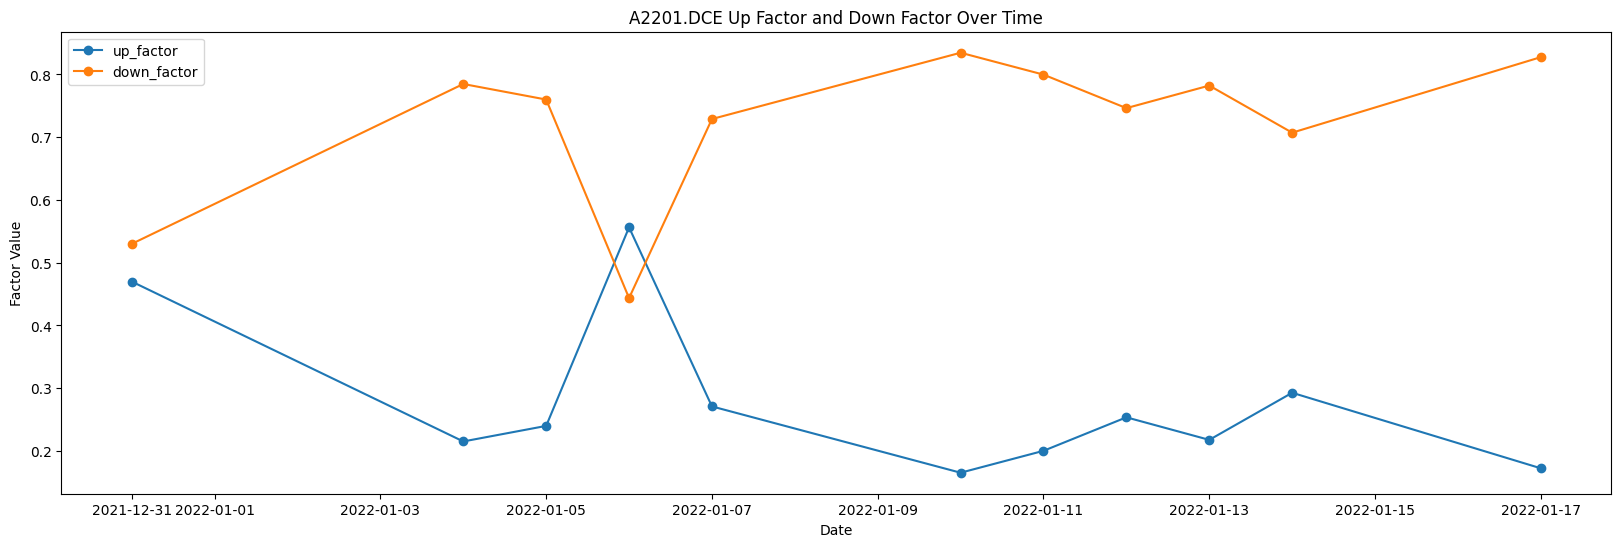

In [36]:
aa = pd.to_datetime(dfA2201['date'], format='%Y%m%d')


# 画曲线
plt.figure(figsize=(20, 6))
plt.plot(aa, dfA2201['up_factor'], label='up_factor', marker='o')
plt.plot(aa, dfA2201['down_factors'], label='down_factor', marker='o')

# 添加标题和标签
plt.title('A2201.DCE Up Factor and Down Factor Over Time')
plt.xlabel('Date')
plt.ylabel('Factor Value')

# 添加图例
plt.legend()

# 自动调整日期显示格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 显示图形
plt.show()

In [166]:
##不运行这个，这个不适合分析
up_factors = _I.model_inference(model_best, setting)

Inferencing: 20211231 - 20220401
[Load Data] | 2024-01-26 12:46:40 Done | Using  0.291 seconds
DataSet Initialized
 	 - Mode:         INFERENCE
 	 - Image Size:   (64, 60)
 	 - Time Period:  20211231 - 20220401
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True


Generating Images (sample rate: 1.0): 100%|██████████| 441/441 [00:53<00:00,  8.25it/s]


TypeError: 'ImageDataSet' object is not subscriptable

# 原参考

### 为了改test的bug做的一些小研究

In [147]:
c=True
type(c)

bool

In [176]:
import numpy as np

# 单一元素的 NumPy 数组
a = np.array(True)

# 方法1: 使用 np.newaxis
#a_modified_1 = a[np.newaxis, :]

# 方法2: 使用 np.expand_dims
a_modified_2 = np.expand_dims(a, axis=0)

# 输出结果
print("原始数组:", a)
#print("使用 np.newaxis 转换后:", a_modified_1)
print("使用 np.expand_dims 转换后:", a_modified_2)


原始数组: True
使用 np.expand_dims 转换后: [ True]


In [178]:
type(a_modified_2)

numpy.ndarray

In [172]:
import numpy as np

# 单一元素的 NumPy 数组
array_single = np.array(True)

# 多个元素的 NumPy 数组
array_multiple = np.array([True, True])

# 检查形状
shape_single = array_single.shape if isinstance(array_single, np.ndarray) else ()
shape_multiple = array_multiple.shape if isinstance(array_multiple, np.ndarray) else ()

# 输出形状
print("单一元素数组的形状:", shape_single)
print("多个元素数组的形状:", shape_multiple)

# 辨别
if len(shape_single) == 0:
    print("这是单一元素的 NumPy 数组 True")
elif len(shape_multiple) > 0:
    print("这是包含多个元素的 NumPy 数组 [True, True]")
else:
    print("无法辨别数组类型")


单一元素数组的形状: ()
多个元素数组的形状: (2,)
这是单一元素的 NumPy 数组 True


In [177]:
print(array_single)

True


In [174]:
type(array_single)

numpy.ndarray

In [171]:
type(array_single)

numpy.ndarray

In [166]:
import torch
import numpy as np

# 原始数据
original_list = [True,True]

# 转换为 PyTorch 张量，并放置在 CUDA 设备上（如果可用）
c = torch.tensor(original_list, device='cuda:0')

# 转换为 NumPy 数组，压缩维度
c = np.squeeze(c.cpu().numpy())

print(c)

[ True  True]


In [159]:
# 原始数据
original_list = [True,True]

# 转换为 PyTorch 张量，并放置在 CUDA 设备上（如果可用）
c = torch.tensor(original_list, device='cuda:0')
c = np.squeeze(c.cpu().numpy())
c

array([ True,  True])

In [152]:
arr = np.array([True])

In [154]:
print(type(arr))

<class 'numpy.ndarray'>


In [135]:
c=True
if isinstance(c, (int, float)):
    # 如果是标量，将其转换为列表
    c = [c]

In [141]:
print(c)

[True]


### 照理说应该有464张图，但是跳过了一些图

In [44]:
#这里的参数是yml文件里声明的
inferencexk_dataset = _D.ImageDataSet(win_size = setting.DATASET.LOOKBACK_WIN, \
                            start_date = setting.DATASET.START_DATE, \
                            end_date = setting.DATASET.END_DATE, \
                            mode = 'inferencexk', \
                            label = setting.TRAIN.LABEL, \
                            indicators = setting.DATASET.INDICATORS, \
                            show_volume = setting.DATASET.SHOW_VOLUME, \
                            parallel_num=setting.DATASET.PARALLEL_NUM)

[Load Data] | 2024-01-22 02:40:12 Done | Using  7.118 seconds
DataSet Initialized
 	 - Mode:         INFERENCEXK
 	 - Image Size:   (64, 60)
 	 - Time Period:  20091231 - 20111231
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True


In [45]:
retrainxk_image_set = inferencexk_dataset.generate_images(setting.DATASET.SAMPLE_RATE)

Generating Images (sample rate: 0.2): 100%|██████████| 2283/2283 [08:11<00:00,  4.64it/s]


In [59]:
len(retrain_image_set[0][1])

40

In [31]:
len(retrain_image_set)

2283

## 尝试改下数据集

## 图像展示

In [22]:
#这里的参数是yml文件里声明的
inference_dataset = _D.ImageDataSet(win_size = setting.DATASET.LOOKBACK_WIN, \
                            start_date = setting.DATASET.START_DATE, \
                            end_date = setting.DATASET.END_DATE, \
                            mode = 'inference', \
                            label = setting.TRAIN.LABEL, \
                            indicators = setting.DATASET.INDICATORS, \
                            show_volume = setting.DATASET.SHOW_VOLUME, \
                            parallel_num=setting.DATASET.PARALLEL_NUM)

[Load Data] | 2024-01-22 02:11:54 Done | Using  7.324 seconds
DataSet Initialized
 	 - Mode:         INFERENCE
 	 - Image Size:   (64, 60)
 	 - Time Period:  20091231 - 20111231
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True


In [23]:
inference_image_set= inference_dataset.generate_images(setting.DATASET.SAMPLE_RATE)

Generating Images (sample rate: 0.2): 100%|██████████| 2283/2283 [08:17<00:00,  4.59it/s]


In [27]:
# 通过设置 max_rows 为 None，可以显示所有行
pd.set_option('display.max_rows', None)

In [26]:
len(inference_image_set[0][1])

87

In [38]:
inference_image_set[0][0]

'000001.SZ'

In [28]:
inference_image_set[0][1][0][2]

1

In [29]:
inference_image_set[0][1][0]

[array([[  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.]]),
 1,
 1]

### image_set每一行存着其所属股票代码，其同一股票下的所有图片集（图片，标签1，标签2），其同一股票下的所有日期

所属股票代码

In [62]:
image_set_try[0][0]

'000001.SZ'

同一股票下所有图片集

In [64]:
len(image_set_try[0][1])

83

第一张图片的image_set

In [65]:
image_set_try[0][1][0]

[array([[  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   0.,   0.,   0.]]),
 1,
 1]

所有图片日期

In [67]:
len(image_set_try[0][2])

83

In [103]:
image_set_try[0][2][0]

20100201

In [111]:
k.iloc[0:3,0]

0    0
1    1
2    2
Name: Unnamed: 0, dtype: int64

In [96]:
k[k['code']=='000001.SZ']

,Unnamed: 0,code,date,open,high,low,close,volume
0,0,000001.SZ,20100105,852.76,858.14,816.85,836.60,556499.82
1,1,000001.SZ,20100106,834.80,834.80,815.77,822.24,412143.13
2,2,000001.SZ,20100107,822.24,827.62,804.28,813.26,355336.85
3,3,000001.SZ,20100108,807.87,816.85,802.49,811.47,288543.06
4,4,000001.SZ,20100111,843.78,850.24,799.98,811.47,442846.02
5,5,000001.SZ,20100112,810.39,813.26,782.74,806.08,591795.91
6,6,000001.SZ,20100113,785.25,786.33,746.84,752.58,935039.47
7,7,000001.SZ,20100114,754.02,759.76,739.65,752.94,521194.74
8,8,000001.SZ,20100115,754.73,777.35,741.45,769.46,539508.46
9,9,000001.SZ,20100118,769.46,781.30,761.56,770.89,349126.52


在指定的日期之内有0-484一共有485张图

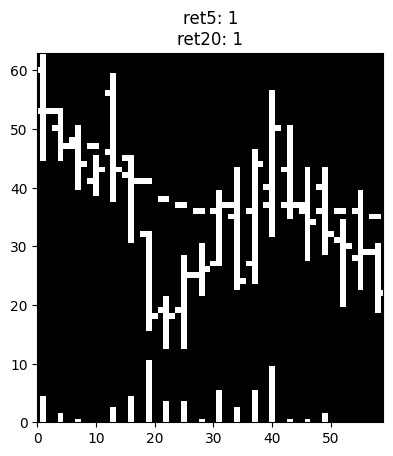

In [58]:
_U.display_image(image_set_try[0][1][0])

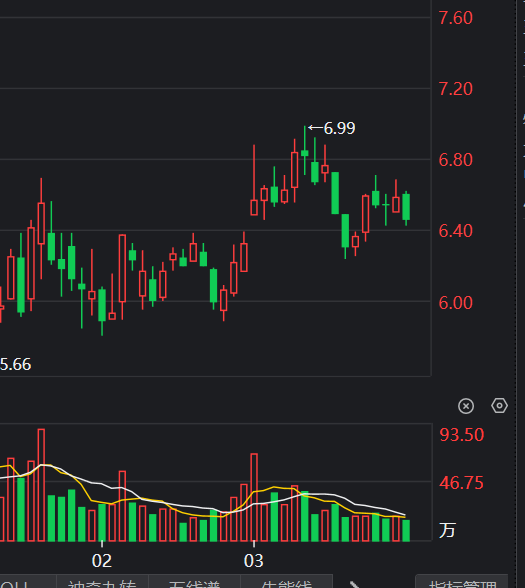

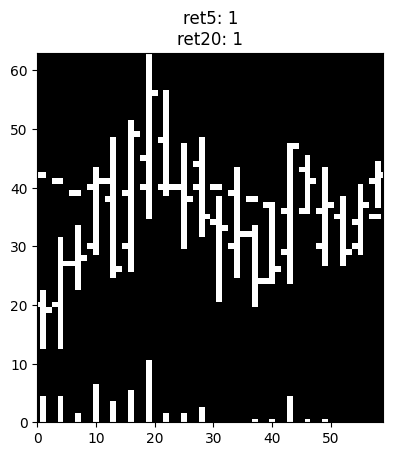

In [87]:
_U.display_image(image_set_try[0][1][1])

#### 成交量、MA、OHLC图

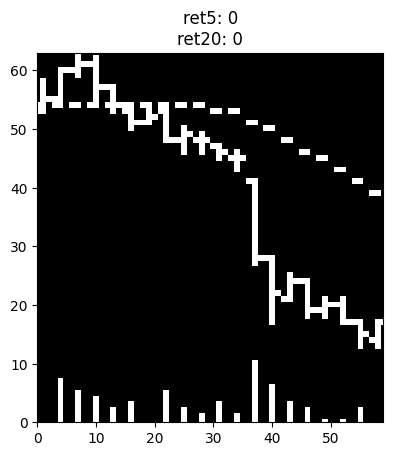

In [19]:
# preview of the "image" (np.array)
_U.display_image(image_set[69])

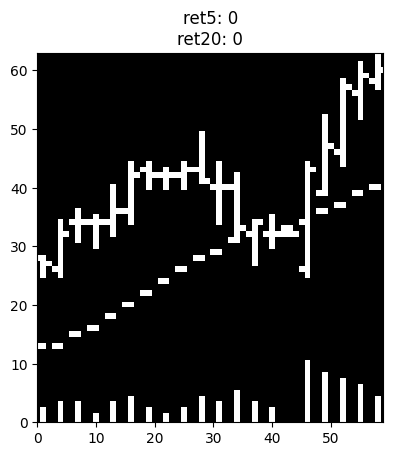

In [38]:
# preview of the "image" (np.array)
_U.display_image(image_set[100])

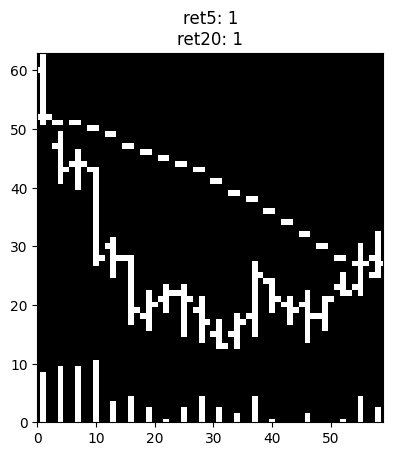

In [20]:
# preview of the "image" (np.array)
_U.display_image(image_set[100])

## 划分训练集、验证集

In [141]:
train_loader_size = int(len(image_set)*(1-setting.TRAIN.VALID_RATIO))
valid_loader_size = len(image_set) - train_loader_size
#从image_set里随机划分训练集和验证集
train_loader, valid_loader = torch.utils.data.random_split(image_set, [train_loader_size, valid_loader_size])

In [142]:
#创建了一个名为 train_loader 的数据加载器，该加载器可以在训练模型时按照指定的批次大小和是否洗牌的要求加载训练数据。
train_loader_data = torch.utils.data.DataLoader(dataset=train_loader, batch_size=setting.TRAIN.BATCH_SIZE, shuffle=True)
valid_loader_data = torch.utils.data.DataLoader(dataset=valid_loader, batch_size=setting.TRAIN.BATCH_SIZE, shuffle=True)

In [144]:
train_loader[0]

[array([[  0., 255.,   0., ...,   0., 255.,   0.],
        [  0., 255.,   0., ...,   0., 255.,   0.],
        [  0., 255.,   0., ...,   0., 255.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.],
        [  0.,   0.,   0., ...,   0., 255.,   0.]]),
 0,
 0]

In [22]:
image_set[100][2]

1

## 构建模型、训练

### Model Structure

In [23]:
#网络模型构建，20天的模型
model_d20 = _M.CNN20d()
model_d20.to(device)

CNN20d(
  (conv1): Sequential(
    (Conv): Conv2d(1, 64, kernel_size=(5, 3), stride=(3, 1), padding=(3, 1), dilation=(2, 1))
    (BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (ReLU): ReLU()
    (Max-Pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (Conv): Conv2d(64, 128, kernel_size=(5, 3), stride=(1, 1), padding=(3, 1))
    (BN): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (ReLU): ReLU()
    (Max-Pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (Conv): Conv2d(128, 256, kernel_size=(5, 3), stride=(1, 1), padding=(2, 1))
    (BN): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (ReLU): ReLU()
    (Max-Pool): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (DropOut): Dropout(p=0.5

### Training Process

 这步已经生成了模型不用再去运行！！！

In [24]:
#二元交叉熵损失函数，用于二分类问题，最小化模型输出与实际标签之间的二元交叉熵
criterion = nn.BCELoss()
'''
优化器执行模型参数的更新。
- Adam 是一种常用的随机梯度下降优化算法的变种，它具有自适应学习率的特性。
- weight_decay 是正则化项的权重，用于控制模型的复杂度。正则化有助于防止过拟合。
'''
optimizer = optim.Adam(model_d20.parameters(), lr=setting.TRAIN.LEARNING_RATE, weight_decay=setting.TRAIN.WEIGHT_DECAY)

In [25]:
train_loss_set, valid_loss_set, train_acc_set, valid_acc_set = _T.train_n_epochs(setting.TRAIN.NEPOCH, model_d20, setting.TRAIN.LABEL, train_loader, valid_loader, criterion, optimizer, setting.TRAIN.MODEL_SAVE_FILE, setting.TRAIN.EARLY_STOP_EPOCH)

Epoch: 1 Training Loss: 1.026906 Validation Loss: 0.728436 Training Acc: 0.51158 Validation Acc: 0.53640
Validation loss decreased (inf --> 0.728436).  Saving model ...
Epoch: 2 Training Loss: 0.920022 Validation Loss: 0.701665 Training Acc: 0.52655 Validation Acc: 0.55338
Validation loss decreased (0.728436 --> 0.701665).  Saving model ...
Epoch: 3 Training Loss: 0.859938 Validation Loss: 0.710304 Training Acc: 0.53229 Validation Acc: 0.53774
Epoch: 4 Training Loss: 0.808764 Validation Loss: 0.692612 Training Acc: 0.54324 Validation Acc: 0.55595
Validation loss decreased (0.701665 --> 0.692612).  Saving model ...
Epoch: 5 Training Loss: 0.775091 Validation Loss: 0.683294 Training Acc: 0.54775 Validation Acc: 0.56701
Validation loss decreased (0.692612 --> 0.683294).  Saving model ...
Epoch: 6 Training Loss: 0.751025 Validation Loss: 0.680212 Training Acc: 0.55526 Validation Acc: 0.57110
Validation loss decreased (0.683294 --> 0.680212).  Saving model ...
Epoch: 7 Training Loss: 0.7320

## 验证误差没有继续再降低了，就停止训练了！！！

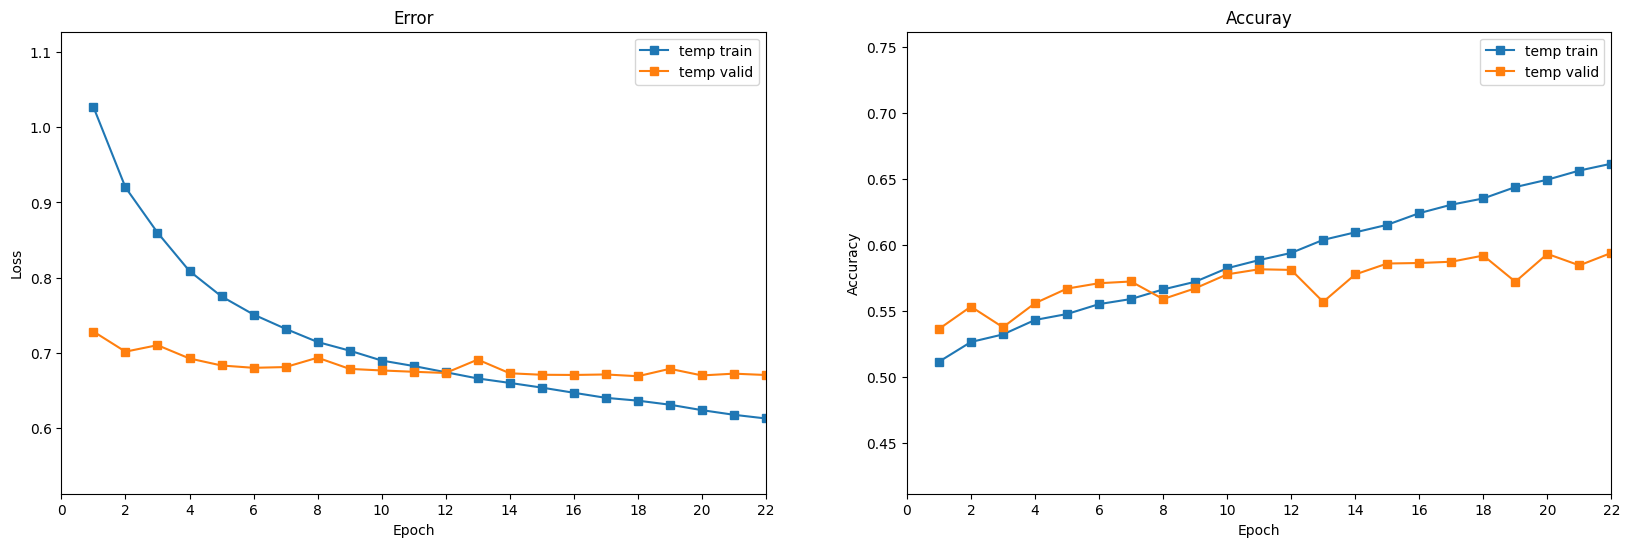

In [26]:
_T.plot_loss_and_acc({"temp train": [train_loss_set, train_acc_set], \
                    "temp valid": [valid_loss_set, valid_acc_set]})

In [27]:
log = pd.DataFrame([train_loss_set, train_acc_set, valid_loss_set, valid_acc_set], index=['train_loss', 'train_acc', 'valid_loss', 'valid_acc'])
log.to_csv(setting.TRAIN.LOG_SAVE_FILE)

In [28]:
logs = pd.read_csv(setting.TRAIN.LOG_SAVE_FILE, index_col=0).T

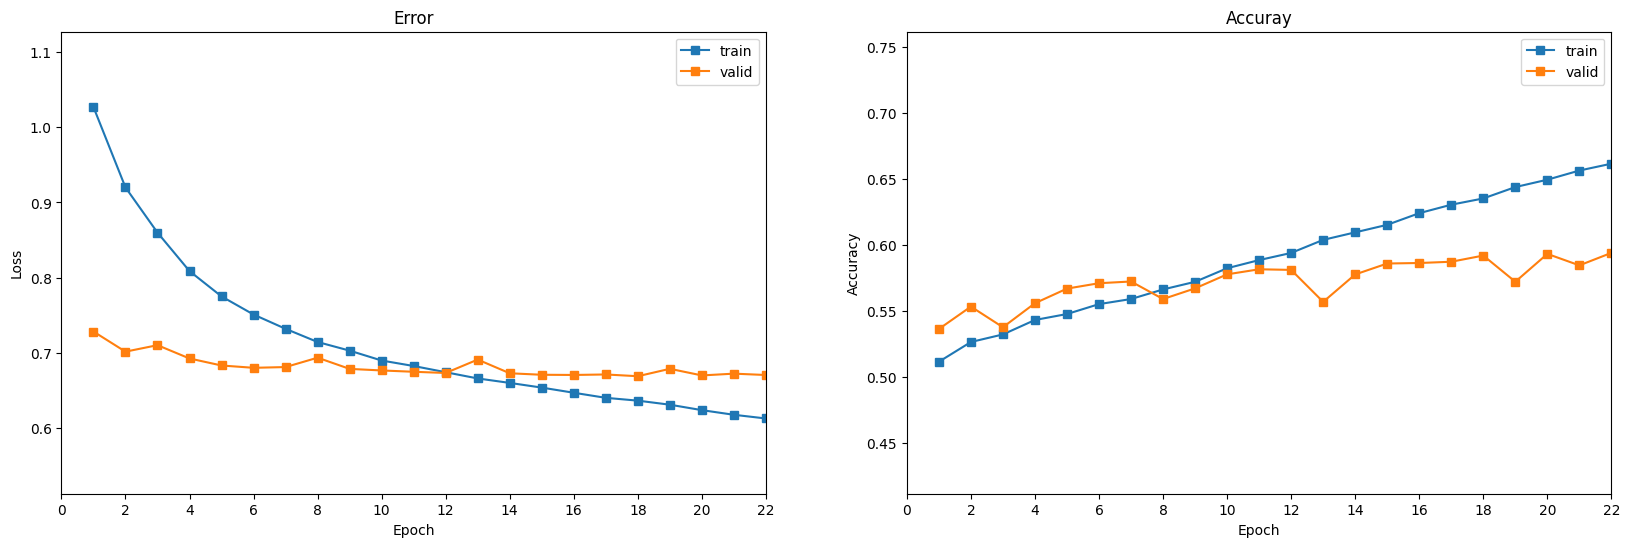

In [29]:
_T.plot_loss_and_acc({"train": [logs['train_loss'], logs['train_acc']], \
                    "valid": [logs['valid_loss'], logs['valid_acc']]})

## Test测试

In [27]:
import torch.utils.data
#torch.utils.data.random_split
print(torch.utils.data.random_split)

<function random_split at 0x7f51019f1790>


## 原来的数据时间test

In [36]:
model_best =  _M.CNN20d()
model_best.to(device)

# Load Model
##加载训练好的模型/root/CNN-for-Trading/models/I20R5_OHLC/I20R5_OHLC_09-11.tar
state_dict = torch.load(setting.TRAIN.MODEL_SAVE_FILE)
model_best.load_state_dict(state_dict['model_state_dict'])

<All keys matched successfully>

## 开始测试

In [46]:
criterion = nn.BCELoss()
_TE.model_test(model_best, setting.TRAIN.LABEL, ['down', 'up'], criterion, setting)

Testing: 20111231 - 20120401
[Load Data] | 2024-01-17 15:06:18 Done | Using  7.017 seconds
DataSet Initialized
 	 - Mode:         TEST
 	 - Image Size:   (64, 60)
 	 - Time Period:  20111231 - 20120401
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True


Generating Images (sample rate: 1.0): 100%|██████████| 2309/2309 [06:00<00:00,  6.41it/s]


cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

Generating Images (sample rate: 1.0): 100%|██████████| 2369/2369 [06:08<00:00,  6.43it/s]


cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

Generating Images (sample rate: 1.0): 100%|██████████| 2428/2428 [06:57<00:00,  5.82it/s]


cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

Generating Images (sample rate: 1.0): 100%|██████████| 2453/2453 [06:40<00:00,  6.12it/s]


cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

## Inference推理

In [47]:
up_factors = _I.model_inference(model_best, setting)

Inferencing: 20111231 - 20120401
[Load Data] | 2024-01-17 15:41:46 Done | Using  6.727 seconds
DataSet Initialized
 	 - Mode:         INFERENCE
 	 - Image Size:   (64, 60)
 	 - Time Period:  20111231 - 20120401
 	 - Indicators:   [('MA', ['20'])]
 	 - Volume Shown: True


Generating Images (sample rate: 1.0): 100%|██████████| 2309/2309 [06:00<00:00,  6.40it/s]


TypeError: 'ImageDataSet' object is not subscriptable